# Data Exploration for microCT Stack and Preprocessing for Stitching
### Understanding, visualizing, and preparing microCT image stacks for downstream stitching

Following tasks are performed:
- Load and inspect microCT image stacks (tif) 
- Visualize the same plane from all stacks
- Preprocess and postproces images from stitching 


In [ ]:
#Import Dependencies

# Numerical computing
import numpy as np

# File and directory handling
import os
import shutil  # for moving/copying/deleting folders
import tifffile
from pathlib import Path
from tqdm import tqdm  # import tqdm for progress bar
import glob

# Image I/O
from skimage.io import imread  # reading image files (e.g., TIFF, PNG)
from tifffile import imwrite   # writing TIFF files efficiently
from PIL import Image          # additional image reading/conversion capabilities

# Visualization
import matplotlib.pyplot as plt

# OpenCV for image operations (filtering, resizing, morphological ops, etc.)
import cv2
font = cv2.FONT_HERSHEY_SIMPLEX  # font for drawing text on images

In [11]:
#Load and inspect microCT image stacks (tif) 

def inspect_tiff(file_path, patch_size=100):
    """
    Inspect a TIFF file: print dtype, shape, and min/max of a small patch.

    Args:
        file_path (str): Path to the TIFF file.
        patch_size (int): Size of the top-left patch to inspect.
    """
    with tifffile.TiffFile(file_path) as tif:
        page = tif.pages[0]  # first image/page in the TIFF
        print(f"File: {file_path}")
        print("Data type:", page.dtype)
        print("Shape:", page.shape)
        
        # Read a small top-left patch for quick inspection
        block = page.asarray()[0:patch_size, 0:patch_size]
        print("Min:", block.min(), "Max:", block.max())
        print("-" * 40)  # separator for readability

# List of TIFF files to inspect
tiff_files = [
    "/pn_local/2_1/pi2-v4.4.4-win-no-opencl/raw/100_N_32B_2_1_Z18.12_X1.80_Y0.50_corr_phrt_1048.tif",
    "/pn_local/2_1/pi2-v4.4.4-win-no-opencl/raw/100_N_32B_2_1_Z18.12_X-1.85_Y0.50_corr_phrt_1048.tif",
    "/pn_local/2_1/pi2-v4.4.4-win-no-opencl/raw/N_32B_half.tif"
]

# Inspect each file
for file in tiff_files:
    inspect_tiff(file)


File: /pn_local/2_1/pi2-v4.4.4-win-no-opencl/raw/100_N_32B_2_1_Z18.12_X1.80_Y0.50_corr_phrt_1048.tif
Data type: float32
Shape: (3869, 3869)
Min: 0.28696153 Max: 0.39353678
----------------------------------------
File: /pn_local/2_1/pi2-v4.4.4-win-no-opencl/raw/100_N_32B_2_1_Z18.12_X-1.85_Y0.50_corr_phrt_1048.tif
Data type: float32
Shape: (3869, 3869)
Min: 0.46710184 Max: 0.53839177
----------------------------------------
File: /pn_local/2_1/pi2-v4.4.4-win-no-opencl/raw/N_32B_half.tif
Data type: float32
Shape: (3864, 1932)
Min: 0.34235248 Max: 0.39175737
----------------------------------------


In [39]:
# Get the same plane from all stacks
im_list = []  # List to store processed images

# List all items in the current directory
dirs = os.listdir()
# dirs.sort()  # Uncomment if you want to process directories in sorted order

for dir_name in dirs:
    #print("Checking directory:", dir_name)
    
    if os.path.isdir(dir_name):  # Only process directories
        for sub_dir in os.listdir(dir_name):
            sub_path = os.path.join(dir_name, sub_dir)
            
            if os.path.isdir(sub_path) and sub_dir == "slices_8":
                # List files in the "slices_8" folder
                slice_files = sorted(os.listdir(sub_path))
                filename = slice_files[899]

                
                if len(slice_files) > 899:  # Ensure index 899 exists
                    filename = slice_files[899]
                    file_path = os.path.join(sub_path, filename)
                    
                    #print("File to process:", filename)
                    print(f"Image #{len(im_list)} - Full path: {file_path}")
                    
                    # Copy the file to "899" folder with a modified name
                    os.makedirs("899", exist_ok=True)  # Make sure folder exists
                    dest_path = os.path.join("899", f"{dir_name}_{filename}")
                    shutil.copyfile(file_path, dest_path)
                    
                    # Read and process the image
                    im = imread(file_path)
                    # Normalize image to 0-255 range for visualization
                    im = cv2.normalize(im, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
                    # Add directory name as text on the image
                    im = cv2.putText(im, dir_name, (300, 900), font, 5, (255, 255, 255), 30)
                    
                    # Append processed image to list
                    im_list.append(im)


                   


Image #0 - Full path: 2_1_Z21.82_X-5.50_Y0.50_corr_phrt/slices_8/slice_0899.tif
Image #1 - Full path: 2_1_Z18.12_X-5.50_Y0.50_corr_phrt/slices_8/slice_0899.tif
Image #2 - Full path: 2_1_Z18.12_X-1.85_Y0.50_corr_phrt/slices_8/slice_0899.tif
Image #3 - Full path: 2_1_Z18.12_X-5.50_Y-4.60_corr_phrt/slices_8/slice_0899.tif
Image #4 - Full path: 2_1_Z18.12_X1.80_Y-4.60_corr_phrt/slices_8/slice_0898.tif
Image #5 - Full path: 2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8/slice_0898.tif
Image #6 - Full path: 2_1_Z21.82_X-5.50_Y-4.60_corr_phrt/slices_8/slice_0899.tif
Image #7 - Full path: 2_1_Z21.82_X-1.85_Y-4.60_corr_phrt/slices_8/slice_0899.tif
Image #8 - Full path: 2_1_Z21.82_X-1.85_Y0.50_corr_phrt/slices_8/slice_0899.tif
Image #9 - Full path: 2_1_Z21.82_X1.80_Y0.50_corr_phrt/slices_8/slice_0899.tif
Image #10 - Full path: 2_1_Z18.12_X1.80_Y0.50_corr_phrt/slices_8/slice_0899.tif
Image #11 - Full path: 2_1_Z18.12_X-1.85_Y-4.60_corr_phrt/slices_8/slice_0899.tif


In [61]:
#Put images in correct order for the lower part (Z21.82)

# Reorder images using a list instead of a NumPy array
order = [5,7,6,9,8,0]
im_list_sorted1 = [im_list[i] for i in order]



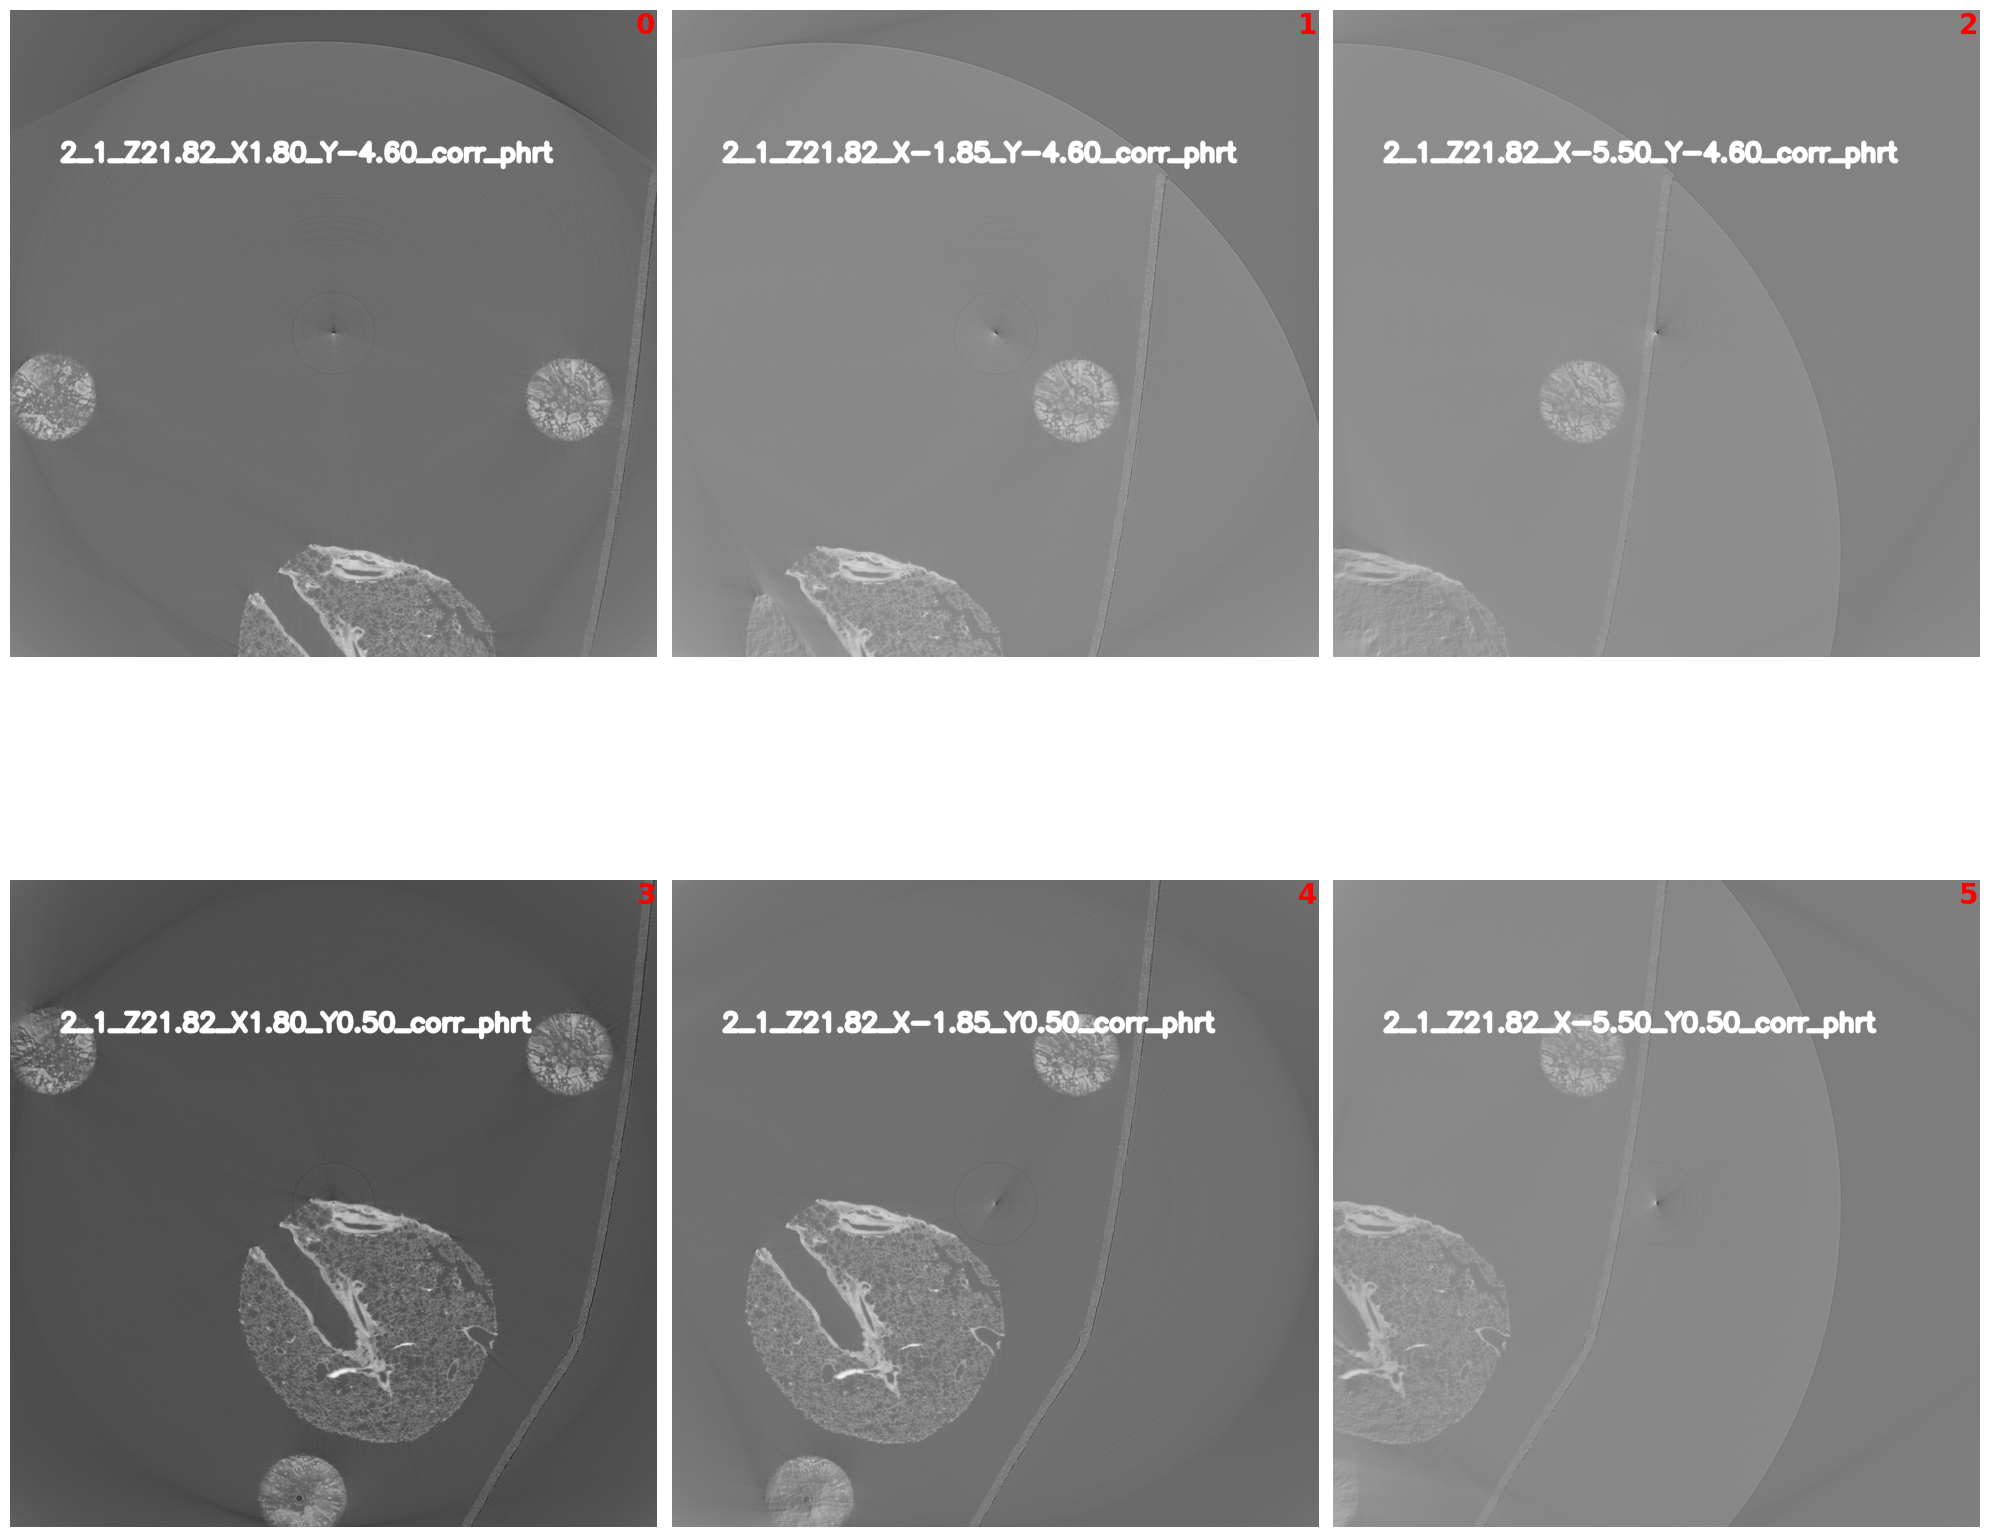

In [ ]:
# Plot an overview to figure out parameter for stitching

idx = 0
fig, axs = plt.subplots(2, 3, figsize=(20, 20))

for i in range(2):
    for j in range(3):
        img = im_list_sorted1[idx]
        axs[i, j].imshow(img, cmap='gray')
        
        # Remove axes
        axs[i, j].axis('off')
        
        # Add the index number on top-right
        axs[i, j].text(
            x=img.shape[1]-10,  # near the right edge
            y=10,               # near the top edge
            s=str(idx),         # index number
            color='red',
            fontsize=20,
            ha='right',         # align text to the right
            va='top',
            fontweight='bold'
        )
        
        idx += 1

plt.tight_layout()
plt.show()


In [ ]:
# Crop all images in the "slices_8_1" subfolder to half size (3864x1932) 
# and save them in a new "half" folder while preserving filenames.
# This was done because the full image produced artifacts during stitching

directory =Path("2_1_Z21.82_X1.80_Y-4.60_corr_phrt")
for subdir in directory.iterdir():
    print(subdir)
    if subdir.name =="slices_8_1":
        for file in subdir.iterdir():
            if file.is_file():
                print(file)
                im = imread(file)
                print(im.shape)
                im_new = im[:3864,:1932]
                imwrite("2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/half/"+str(file.stem)+str(file.suffix),im_new)
            
            #print(im.shape)

2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/slice_0943.tif
(3864, 3864)
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/slice_0614.tif
(3864, 3864)
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/slice_1035.tif
(3864, 3864)
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/slice_0353.tif
(3864, 3864)
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/slice_0421.tif
(3864, 3864)
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/slice_0871.tif
(3864, 3864)
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/slice_0095.tif
(3864, 3864)
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/slice_0357.tif
(3864, 3864)
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/slice_0505.tif
(3864, 3864)
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/slice_0185.tif
(3864, 3864)
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/slice_0673.tif
(3864, 3864)
2_1_Z21.82_X1.80_Y-4.60_corr_phrt/slices_8_1/slice_0970.tif
(3864, 3

In [ ]:
# This script scans all .tif images in "final/full_stack" and deletes images
# that are mostly black (more than 19,804,972 pixels equal to 0).
# These images were produced by stitching errors

i = 0
directory = Path("final/full_stack")

for file in directory.iterdir():
    if file.suffix == ".tif":  # Only process TIFF images
        im_temp = imread(file)
        number = np.count_nonzero(im_temp == 0)  # Count black pixels
        
        if number > 19804972:  # Threshold for mostly-black images
            print("Deleting:", file)
            i += 1
            os.remove(file)  # Delete the file

print("Total deleted images:", i)

In [ ]:

# Load all TIFF images from "final/MM_full_stack" into a list
im_list = []
# Get list of TIFF files and sort
tif_files = glob.glob(os.path.join("final/MM_full_stack/", '*.tif'))
tif_files.sort()

# Iterate with tqdm progress bar
for file_path in tqdm(tif_files, desc="Processing images"):

    im = imread(file_path)
    im_list.append(im)




/usr/local/lib/python3.10/dist-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
Processing images: 100%|██████████| 1983/1983 [02:32<00:00, 12.98it/s]


In [ ]:
#Save as NumPy
np.save("MM_im_list_full.npy",im_list)

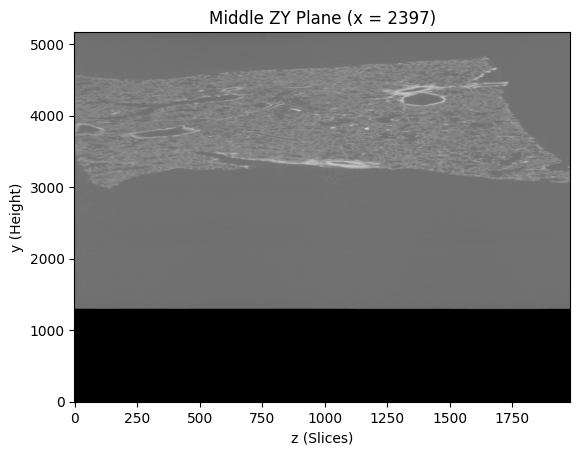

In [ ]:
# Check axial view of stack 
# This was done to normalize the stack

# Stack into 3D volume: shape (z, y, x)
volume = np.stack(im_list, axis=0)

# Get middle x-index
middle_x = volume.shape[2] // 2

# Extract ZY-plane at middle x
zy_plane = volume[:, :, middle_x]  # shape: (z, y)

# Plot
plt.imshow(zy_plane.T, aspect='auto', cmap='gray', origin='lower')
plt.title(f'Middle ZY Plane (x = {middle_x})')
plt.xlabel('z (Slices)')
plt.ylabel('y (Height)')
plt.show()



In [ ]:
volume = np.stack(im_list, axis=0)
print(volume.shape)

(1048, 5170, 4791)
